In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('data/Nadia_Murad.jpg',0)
denis = cv2.imread('data/Denis_Mukwege.jpg',0)
solvay = cv2.imread('data/solvay_conference.jpg',0)

In [3]:
type(nadia)

numpy.ndarray

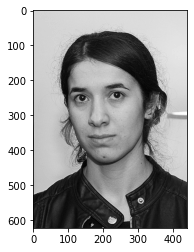

In [4]:
plt.imshow(nadia,cmap='gray')

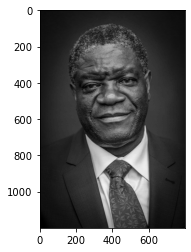

In [5]:
plt.imshow(denis,cmap='gray')

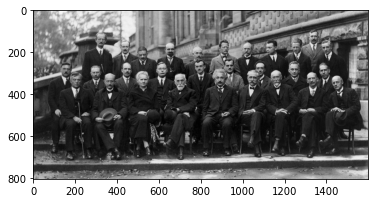

In [6]:
plt.imshow(solvay,cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascades/haarcascade_eye.xml')

In [8]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [9]:
result = detect_face(solvay)

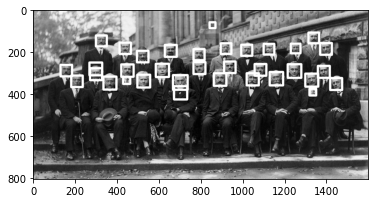

In [10]:
plt.imshow(result,cmap='gray')

In [11]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,255,0),5)
    return face_img

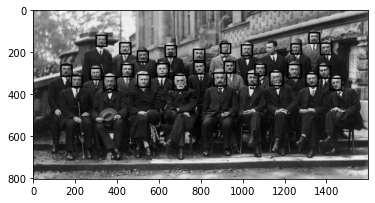

In [12]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [13]:
def detect_eye(img):
    face_img = img.copy()
    eye_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2,minNeighbors=5)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,0,0),5)
    return face_img

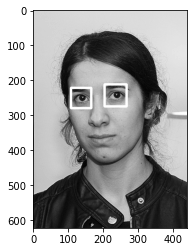

In [14]:
result = detect_eye(nadia)
plt.imshow(result,cmap='gray')

In [16]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    frame = adj_detect_face(frame)
    frame =  detect_eye(frame)
    cv2.imshow('video face detect',frame)
    k=cv2.waitKey(1)
    if k == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()